# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [32]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [33]:
mnist = fetch_openml('mnist_784')
X = mnist['data']
y = mnist['target'].T

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [34]:
print(X.shape, y.shape) # 데이터셋을 호출하는 방법이 다른 것으로 보임.

(70000, 784) (70000,)


In [35]:
df = X
df['y'] = y
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [36]:
# # data를 각 픽셀에 이름붙여 표현 => 필요가 없어졌음
feat_cols = [ 'pixel'+str(i) for i in range(1, X.shape[1]) ]
# df = pd.DataFrame(X,columns=feat_cols)
# df.head()

In [37]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


<Figure size 640x480 with 0 Axes>

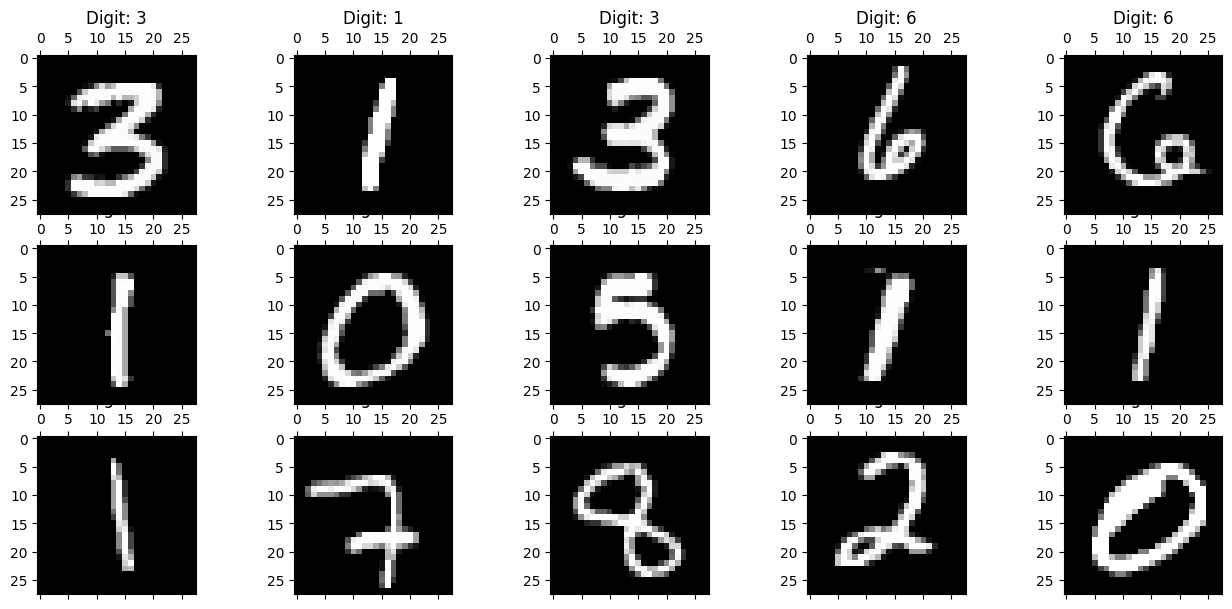

In [38]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis = 1), y, test_size = 0.2, random_state=42)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)
cov = PCA(n_components=X_std.shape[1])
cov.fit(X_std)

PCA(n_components=784)

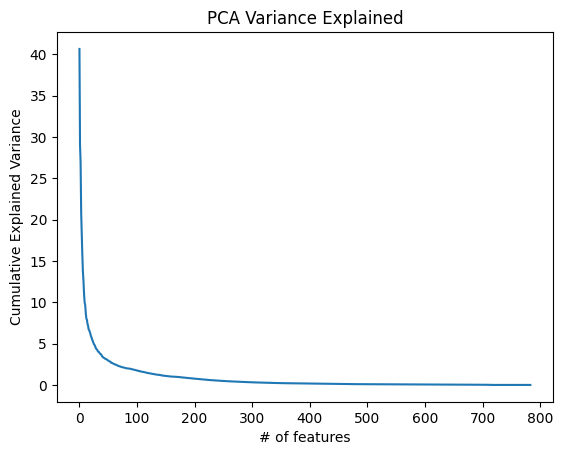

In [42]:
expVar = cov.explained_variance_
plt.xlabel('# of features')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Explained')
plt.plot(expVar)
plt.show()

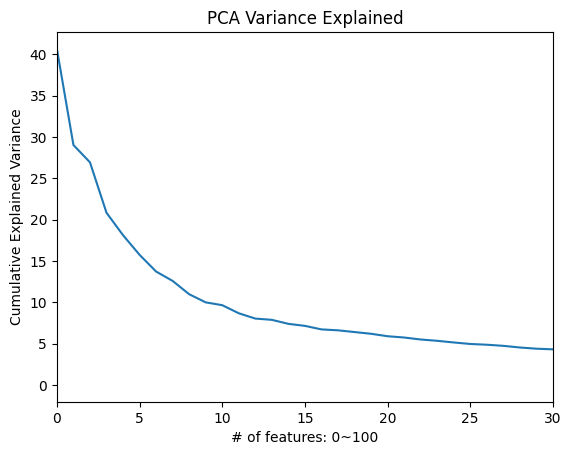

In [43]:
#0~30사이를 보겠다.
plt.xlabel('# of features: 0~100')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Explained')
plt.xlim(0, 30)
plt.plot(expVar)
plt.show()

#n_components = 15로 설정.

In [44]:
model = PCA(n_components=15)
pca_features = model.fit_transform(X_std)

In [45]:
pca_features.shape

(56000, 15)

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X = X_std, y = y_train)
lda_features = lda.fit_transform(X_std, y_train)


In [47]:
lda_features.shape #784개의 feature가 9개의 feature로 감소했다.

(56000, 9)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [48]:
import time

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

In [49]:
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [50]:
model1 = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(784,)),
  keras.layers.Dense(128, activation='relu'), #DNN
  keras.layers.Dense(10)
])
model1.compile(
    optimizer=keras.optimizers.Adam(0.001), #Adam
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [51]:
#1. 원본데이터로 훈련
start = time.time()
model1_history = model1.fit(X_std, y_train, epochs=100)
model1_end = time.time()

Epoch 1/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.2477 - sparse_categorical_accuracy: 0.9327
Epoch 2/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.1066 - sparse_categorical_accuracy: 0.9691
Epoch 3/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0768 - sparse_categorical_accuracy: 0.9784
Epoch 4/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0548 - sparse_categorical_accuracy: 0.9841
Epoch 5/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0379 - sparse_categorical_accuracy: 0.9882
Epoch 6/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0329 - sparse_categorical_accuracy: 0.9898
Epoch 7/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0289 - sparse_categorical_accuracy: 0.9917
Epoch 8/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0244 - sparse_categorical_accuracy: 0.9922
Epoch 9/100
1750/1750 [=

In [52]:
print(model1_end - start)

284.82120513916016


In [53]:
results = model1.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

110/110 [==============================] - 0s 3ms/step - loss: 463.2888 - sparse_categorical_accuracy: 0.8744
test loss, test acc: [463.28875732421875, 0.8744285702705383]


In [54]:

model2 = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(15,)),
  keras.layers.Dense(10, activation='relu'),
  keras.layers.Dense(10)
])
model2.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

In [55]:
#2. PCA데이터로 훈련
start = time.time()
model2_history = model2.fit(pca_features, y_train, epochs=100)
model2_end = time.time()

Epoch 1/100
1750/1750 [==============================] - 3s 2ms/step - loss: 1.1816 - sparse_categorical_accuracy: 0.6574
Epoch 2/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.5103 - sparse_categorical_accuracy: 0.8406
Epoch 3/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.4592 - sparse_categorical_accuracy: 0.8565
Epoch 4/100
1750/1750 [==============================] - 3s 1ms/step - loss: 0.4391 - sparse_categorical_accuracy: 0.8635
Epoch 5/100
1750/1750 [==============================] - 2s 1ms/step - loss: 0.4251 - sparse_categorical_accuracy: 0.8685
Epoch 6/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.4140 - sparse_categorical_accuracy: 0.8723
Epoch 7/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.4049 - sparse_categorical_accuracy: 0.8757
Epoch 8/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.3977 - sparse_categorical_accuracy: 0.8767
Epoch 9/100
1750/1750 [=

In [56]:
print(model2_end - start)

257.60734033584595


In [59]:
X_test_std = scaler.fit_transform(X_test)
pca_test = model.fit_transform(X_test_std)

In [61]:
results = model2.evaluate(pca_test, y_test, batch_size=128)
print("test loss, test acc:", results)

110/110 [==============================] - 0s 1ms/step - loss: 1.2905 - sparse_categorical_accuracy: 0.6845
test loss, test acc: [1.2905158996582031, 0.684499979019165]


In [62]:

model3 = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(9,)),
  keras.layers.Dense(10, activation='relu'),
  keras.layers.Dense(10)
])
model3.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

In [63]:
#3. LDA데이터로 훈련
start = time.time()
model3_history = model3.fit(lda_features, y_train, epochs=100)
model3_end = time.time()

Epoch 1/100
1750/1750 [==============================] - 2s 1ms/step - loss: 0.7661 - sparse_categorical_accuracy: 0.7790
Epoch 2/100
1750/1750 [==============================] - 2s 1ms/step - loss: 0.3869 - sparse_categorical_accuracy: 0.8836
Epoch 3/100
1750/1750 [==============================] - 2s 1ms/step - loss: 0.3717 - sparse_categorical_accuracy: 0.8884
Epoch 4/100
1750/1750 [==============================] - 2s 1ms/step - loss: 0.3630 - sparse_categorical_accuracy: 0.8898
Epoch 5/100
1750/1750 [==============================] - 2s 1ms/step - loss: 0.3560 - sparse_categorical_accuracy: 0.8927
Epoch 6/100
1750/1750 [==============================] - 2s 1ms/step - loss: 0.3502 - sparse_categorical_accuracy: 0.8931
Epoch 7/100
1750/1750 [==============================] - 2s 1ms/step - loss: 0.3461 - sparse_categorical_accuracy: 0.8950
Epoch 8/100
1750/1750 [==============================] - 2s 1ms/step - loss: 0.3427 - sparse_categorical_accuracy: 0.8961
Epoch 9/100
1750/1750 [=

In [64]:
print(model3_end - start)

243.91381168365479


In [ ]:
lda_test = lda.fit_transform(X_test_std, y_test)

In [67]:
results = model3.evaluate(lda_test, y_test, batch_size=128)
print("test loss, test acc:", results)

110/110 [==============================] - 0s 1ms/step - loss: 0.3043 - sparse_categorical_accuracy: 0.9081
test loss, test acc: [0.3042520582675934, 0.9080714583396912]


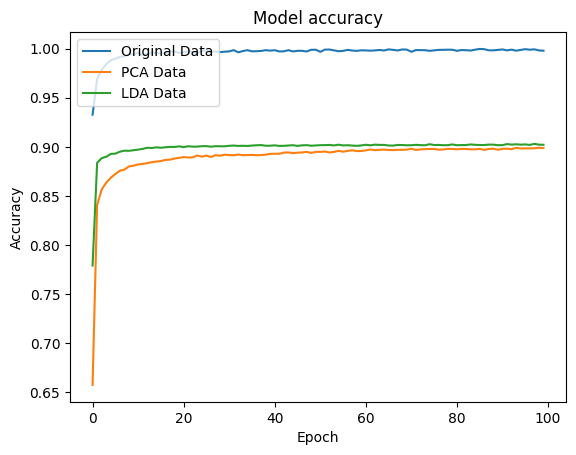

In [78]:
plt.plot(model1_history.history['sparse_categorical_accuracy'])
plt.plot(model2_history.history['sparse_categorical_accuracy'])
plt.plot(model3_history.history['sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Original Data', 'PCA Data', 'LDA Data'], loc='upper left')
plt.show()

# Time / Test Accuracy

- Original Data: 
> (Time) `284s` (Test Accuracy) `87%`
- PCA Data: 
> (Time) `257s` (Test Accuracy) `68%`
- LDA Data: 
> (Time) `243s` (Test Accuracy) `90%`

특정한 틀 없이 자유롭게 해주시면 됩니다!